# COGS 108 - Final Project 

# Overview

My project seeks to determine if there is a relationship between the average household income (pertaining to a zip code) and the number of amenities of a neighborhood park (pertaining to the same zip code). The parks in question are joint-use parks managed by the City of San Diego, and located within the city. I attempt to use linear regression to model a relationship between the _average household income_ and the _number of amenities of a neighborhood park_. At the end, I was not able to find a conclusive relationship between these two variables.

# Name & GitHub

- Name: **Alex N. Guo**
- GitHub Username: **aguoUCSD**

# Research Question

Does variations in the average income level in each zip code (in the City of San Diego) result in differences in the number of park amenities  (pertaining to parks in the respective zip codes)?

_Note: Examples of park amenities include playgrounds, basketball courts, baseball fields, tennis courts, concession stands, and more._

## Background and Prior Work

The City of San Diego is the eighth largest city in the United States by population, consisting of over 1.4 million inhabitants (1). It is the county seat for San Diego County, which itself consists of more than 3.3 million inhabitants (2). Despite the city's growth, the city of San Diego still has a high cost of living in the present day. Income levels can vary greatly between households living in different urban and suburban parts of a county or city, including San Diego. Aside from its beautiful beaches and attractions, many visitors and residents from different socioeconomic backgrounds visit San Diego park and recreational facilities on a common basis.

The City of San Diego maintains a number of park and recreational facilities. Here, we will solely focus on the parks that the City of San Diego owns. The city maintains over 340 parks of various different kinds, such as open space, regional, and community parks (3). Visions of the park's most recent master plan (derived from the 2008 General Plan) called for recreational spaces with ease of access to bike, walk and transit options (4). This comes as city residents viewed upgrades to parks and their facilities as very important. The goal of the city is to ensure that residents have equitable and close access to parks in their neighborhood so that they can enjoy various physical and social benefits of the parks themselves. San Diego's standard formula for a park is that it contains land that offers equity and continued access to recreational experiences (4).

In other cities and counties around the United States, studies from 2013 have shown that neighborhood income and the number of amenities in parks are somewhat correlated. This is important because parks are typically used as venues for exercise, entertainment, hikes, social activities, and much more. Parks give an area for individuals to be exposed to fresh air and vegetation in order to improve the quality of life. The study, published in the journal titled _Annals of Behavorial Medicine_ , involved parks located in the Kansas City, Missouri area (5). It suggested that some lower-income communities had more parks, but the individual parks had fewer amenities and resources for its residents. For instance, lower-income communities had a higher quantity of parks with fewer amenities, while communities of the middle class had parks with improved landscaping features. The researchers of the study said that further research was needed to determine how differences in park amenities and environments relate to "activity levels and health outcomes" (5).

References (include links):
- 1) City of San Diego Population: https://www.sandiego.gov/economic-development/sandiego/population
- 2) San Diego County Population: https://www.counties.org/county-profile/san-diego-county
- 3) San Diego Parks and Recreation: https://www.sandiego.gov/park-and-recreation/parks
- 4) San Diego Parks Master Plan: https://www.sandiego.gov/complete-communities/parks-master-plan
- 5) Media Xpress - Park amenities differ according to income of neighborhoods: https://medicalxpress.com/news/2013-03-amenities-differ-income-neighborhoods.html



# Hypothesis


My hypothesis is that _lower-income areas (by zip code) in the City of San Diego have less park amenities. On the other hand, parks located in higher-income areas (by zip code) would have more park amenities._ This is because the parks are funded by taxes paid by residents of the City of San Diego. Traditionally, higher-income families pay more taxes than lower-income families. Portions of the taxes that residents pay contribute to the funding of parks for their community area. Hence, areas with a higher average income have more tax funding to implement additional park amenities and maintain the parks in a better condition compared to areas whose residents earn a lower average income.

# Dataset(s)

DATASET 1
- Dataset Name: City of San Diego - Joint use parks
- Link to the dataset: https://github.com/COGS108/individual_fa20/blob/master/data/joint_use_datasd.geojson
- Number of observations: 96
- Description: This dataset contains data points pertaining to joint-use parks, which are operated by the City of San Diego and various local school districts (i.e. San Diego Unified, Poway Unified, etc.). Information regarding the park's amenities and location mappings are included.

DATASET 2
- Dataset Name: Median Household Income in San Diego, CA by Zip Code
- Link to the dataset: http://zipatlas.com/us/ca/san-diego/zip-code-comparison/median-household-income.htm
- Number of observations: 30
- Description: This dataset contains the population average household income in the City of San Diego for different zip codes. Data points are from the most recent Census, which is 2010 instead of 2020. (downloaded the table into a tsv -- tab seperated value -- file)

Eventually, I will need to perform a merge on both datasets. First, I will clean Dataset 1 to find the zip code of all of the joint-use parks. Then, I will perform an inner merge on both Datasets 1 and 2 (based on the zip codes present in both datasets).

# Setup

In [1]:
# Imports

import pandas as pd
import geopandas as gpd
import geopy
import numpy as np


import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 5)
plt.rcParams.update({'font.size': 16})
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

import shapely.geometry as shp
from shapely.geometry import Polygon

import sklearn.neighbors as skn
import sklearn.metrics as skm

import statsmodels.api as sm
from scipy.stats import pearsonr, norm, ttest_ind
import patsy


In [2]:
# Read dataset 1 into a dataframe
path = "/home/aguo/individual_fa20/data/joint_use_datasd.geojson"

df = gpd.read_file(path)

In [3]:
# Read dataset 2 into a dataframe
path2 = "/home/aguo/individual_fa20/final_project/sd_income_by_zip.tsv"

df_2 = pd.read_csv(path2, sep='\t')

# Data Cleaning

### Clean Dataset 1

In [4]:
df.head()

,objectid,name,facility,school_dis,city_acres,dist_acres,enhanced,strt_date,term_yrs,exp_date,...,baseb_90,softball,multi_purp,basketball,tennis_ct,sand_vball,field_ligh,comfort_st,concess_st,geometry
0,2087,Adams Elementary,Adams Avenue Community Park,San Diego Unified,1.12,1.38,N,1990-07-23,25,2015-07-23T00:00:00,...,0,1,1,0,0,0,0,0,0,"POLYGON ((-117.11740 32.76309, -117.11824 32.7..."
1,2088,Alcott Elementary,Alcott Elementary,San Diego Unified,0.00,6.11,N,2006-09-19,25,2031-09-19T00:00:00,...,0,1,1,0,0,0,0,0,0,"POLYGON ((-117.22107 32.83165, -117.22061 32.8..."
2,2089,Bayview Terrace Elementary,Bayview Terrace Elementary,San Diego Unified,0.00,3.50,N,2000-10-16,25,2025-10-10T00:00:00,...,0,1,1,1,0,0,0,0,0,"MULTIPOLYGON (((-117.22259 32.80191, -117.2226..."
3,2090,Bird Rock Elementary,Bird Rock Neighborhood Park,San Diego Unified,0.70,1.09,Y,2005-05-03,25,2030-05-03T00:00:00,...,0,1,1,1,0,0,0,0,0,"MULTIPOLYGON (((-117.26283 32.81082, -117.2626..."
4,2091,Black Mountain Middle School,Black Mountain Middle,San Diego Unified,0.00,1.60,N,1990-06-11,50,2040-05-29T00:00:00,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-117.12547 32.96962, -117.12537 32.9..."


In [5]:
df.describe()

,objectid,city_acres,dist_acres,term_yrs,council_di,serv_dist,playground,tot_lot,playg_inst,baseb_50_6,baseb_90,softball,multi_purp,basketball,tennis_ct,sand_vball,field_ligh,comfort_st,concess_st
count,96.000000,96.000000,96.000000,96.000000,96.0,96.000000,96.000000,96.000000,96.0,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.0,96.000000,96.000000
mean,2134.500000,0.621667,3.626562,27.125000,0.0,42.218750,0.343750,0.135417,0.0,0.166667,0.020833,0.739583,1.083333,0.687500,0.208333,0.010417,0.0,0.072917,0.020833
std,27.856777,1.667808,3.998795,12.605137,0.0,4.748857,0.595211,0.343964,0.0,0.574304,0.143576,0.965127,0.592349,1.378882,1.104218,0.102062,0.0,0.261365,0.143576
min,2087.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,2110.750000,0.000000,1.572500,25.000000,0.0,41.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,2134.500000,0.000000,2.705000,25.000000,0.0,43.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
75%,2158.250000,0.000000,4.150000,25.000000,0.0,44.250000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000
max,2182.000000,6.780000,31.000000,99.000000,0.0,45.000000,3.000000,1.000000,0.0,3.000000,1.000000,5.000000,4.000000,8.000000,8.000000,1.000000,0.0,1.000000,1.000000


I will extract the location coordinates (latitude and longitude) from the Polygon or MultiPolygon object for each park. Then, I will make use of the Nominatim geolocater to determine the zip code of each joint-use park from latitude and longitude values.

In [6]:
location = []
zip_codes = []

In [7]:
for index, row in df.iterrows():
    try: # Multipolygon
        if (len(row['geometry']) > 0):
            
            poly = list(row['geometry'])
            
            x, y = poly[0].exterior.coords.xy
            
            location.append((y[0], x[0]))
            
    except: # Single polygon
        
        poly = row['geometry']
        
        x, y = poly.exterior.coords.xy
        
        location.append((y[0], x[0]))

In [8]:
geolocator = geopy.Nominatim(user_agent='http')

In [9]:
def get_zipcode(geolocator, location_entry):
    
    location = geolocator.reverse(location_entry)
    return location.raw['address']['postcode']

In [10]:
for entry in location:
    zip_codes.append(get_zipcode(geolocator, entry)[0:5])

In [11]:
for code_ind in range(len(zip_codes)):
    zip_codes[code_ind] = int(zip_codes[code_ind][0:5])

After processing the zip codes for each joint-use park, I will need to create a new column and insert the zip codes into the dataframe.

In [12]:
df.insert(4, "zip_code", zip_codes, True) 

df.head()

,objectid,name,facility,school_dis,zip_code,city_acres,dist_acres,enhanced,strt_date,term_yrs,...,baseb_90,softball,multi_purp,basketball,tennis_ct,sand_vball,field_ligh,comfort_st,concess_st,geometry
0,2087,Adams Elementary,Adams Avenue Community Park,San Diego Unified,92116,1.12,1.38,N,1990-07-23,25,...,0,1,1,0,0,0,0,0,0,"POLYGON ((-117.11740 32.76309, -117.11824 32.7..."
1,2088,Alcott Elementary,Alcott Elementary,San Diego Unified,92117,0.00,6.11,N,2006-09-19,25,...,0,1,1,0,0,0,0,0,0,"POLYGON ((-117.22107 32.83165, -117.22061 32.8..."
2,2089,Bayview Terrace Elementary,Bayview Terrace Elementary,San Diego Unified,92109,0.00,3.50,N,2000-10-16,25,...,0,1,1,1,0,0,0,0,0,"MULTIPOLYGON (((-117.22259 32.80191, -117.2226..."
3,2090,Bird Rock Elementary,Bird Rock Neighborhood Park,San Diego Unified,92109,0.70,1.09,Y,2005-05-03,25,...,0,1,1,1,0,0,0,0,0,"MULTIPOLYGON (((-117.26283 32.81082, -117.2626..."
4,2091,Black Mountain Middle School,Black Mountain Middle,San Diego Unified,92129,0.00,1.60,N,1990-06-11,50,...,0,0,0,0,0,0,0,0,0,"POLYGON ((-117.12547 32.96962, -117.12537 32.9..."


Below shows the columns for the original dataframe (after adding the zip code column). The values for each column in row index 90 (corresponding to Horton Elementary) are present below. Note that there are 30 columns so far.

In [13]:
df.iloc[90]

objectid                                                   2177
name                                          Horton Elementary
facility                                      Horton Elementary
school_dis                                    San Diego Unified
zip_code                                                  92102
city_acres                                                    1
dist_acres                                                  2.5
enhanced                                                      N
strt_date                                            2018-01-23
term_yrs                                                     25
exp_date                                    2043-01-23T00:00:00
address                                      4990 Guymon Street
community                                               ENCANTO
notes                  Turfed play field, hard courts, DG track
council_di                                                    0
serv_dist                               

### Clean Dataset 2

In [14]:
df_2.head()


,#,zip_code,Location,City,Population,avg_house_income,National_Rank
0,1.0,92130,"32.957195, -117.202542","San Diego, California","28,187","$93,929.00",#372
1,2.0,92131,"32.893250, -117.087091","San Diego, California","29,279","$90,811.00",#440
2,3.0,92129,"32.961064, -117.134917","San Diego, California","47,217","$77,851.00",#943
3,4.0,92127,"33.017518, -117.118456","San Diego, California","20,032","$75,219.00","#1,098"
4,6.0,92128,"33.000269, -117.072093","San Diego, California","42,728","$66,676.00","#1,918"


We only need to look at values of focus, such as zip code, population, and average household income. We will simplify dataset 2 here.

In [15]:
df_2 = df_2[['zip_code', 'Population', 'avg_house_income']].copy()

df_2.head()

,zip_code,Population,avg_house_income
0,92130,"28,187","$93,929.00"
1,92131,"29,279","$90,811.00"
2,92129,"47,217","$77,851.00"
3,92127,"20,032","$75,219.00"
4,92128,"42,728","$66,676.00"


### Merging both datasets

Next, I will perform an inner merge on both datasets, merging on the `zip_code`. Doing so will decease the total number of obsevations from 96 to 88, because there are a few missing zip codes in both datasets.

In [16]:
df = df.merge(df_2, on='zip_code', how='inner')

I will create a new column called `amenities_sum` to count the total number of amenities (all kinds) present in each joint use park.

In [17]:
amenities_sum = df['playground'] + df['tot_lot'] + df['playg_inst'] +df['baseb_50_6'] + df['baseb_90'] + df['softball'] + df['multi_purp'] + df['basketball'] + df['tennis_ct'] + df['sand_vball'] + df['field_ligh'] + df['comfort_st'] + df['concess_st']

In [18]:
df.insert(5, "total_amenities", amenities_sum, True) 

In [19]:
df.head()

,objectid,name,facility,school_dis,zip_code,total_amenities,city_acres,dist_acres,enhanced,strt_date,...,multi_purp,basketball,tennis_ct,sand_vball,field_ligh,comfort_st,concess_st,geometry,Population,avg_house_income
0,2087,Adams Elementary,Adams Avenue Community Park,San Diego Unified,92116,3,1.12,1.38,N,1990-07-23,...,1,0,0,0,0,0,0,"POLYGON ((-117.11740 32.76309, -117.11824 32.7...","33,080","$35,401.00"
1,2104,Edison Elementary,Edison Elementary,San Diego Unified,92116,2,0.00,1.25,N,2007-02-27,...,2,0,0,0,0,0,0,"POLYGON ((-117.11748 32.75013, -117.11748 32.7...","33,080","$35,401.00"
2,2129,Normal Heights Elementary,Normal Heights Elementary,San Diego Unified,92116,4,0.00,2.90,Y,2005-10-31,...,1,1,0,0,0,0,0,"MULTIPOLYGON (((-117.11104 32.76149, -117.1110...","33,080","$35,401.00"
3,2154,Cherokee Point Elementary,Cherokee Point Elementary,San Diego Unified,92116,1,0.44,2.11,N,2004-01-26,...,1,0,0,0,0,0,0,"POLYGON ((-117.11172 32.74698, -117.11169 32.7...","33,080","$35,401.00"
4,2088,Alcott Elementary,Alcott Elementary,San Diego Unified,92117,4,0.00,6.11,N,2006-09-19,...,1,0,0,0,0,0,0,"POLYGON ((-117.22107 32.83165, -117.22061 32.8...","51,203","$47,245.00"


After the merging process is complete, I will further simplify the combined dataframe on column values of focus. This includes `zip_code`, `total_amenities`, `population`, and `avg_house_income`.

In [20]:
# Create a new simple dataframe with the same observations
simple_df = df[['objectid', 'name', 'facility', 'zip_code', 'total_amenities', 'Population', 'avg_house_income']].copy()

In [21]:
simple_df

,objectid,name,facility,zip_code,total_amenities,Population,avg_house_income
0,2087,Adams Elementary,Adams Avenue Community Park,92116,3,"33,080","$35,401.00"
1,2104,Edison Elementary,Edison Elementary,92116,2,"33,080","$35,401.00"
2,2129,Normal Heights Elementary,Normal Heights Elementary,92116,4,"33,080","$35,401.00"
3,2154,Cherokee Point Elementary,Cherokee Point Elementary,92116,1,"33,080","$35,401.00"
4,2088,Alcott Elementary,Alcott Elementary,92117,4,"51,203","$47,245.00"
...,...,...,...,...,...,...,...
83,2146,Valencia Park Elementary,Valencia Park Elementary,92114,3,"66,837","$46,189.00"
84,2181,Encanto Elementary,Encanto Elementary,92114,3,"66,837","$46,189.00"
85,2157,Nicoloff Elementary,Howard Lane Neighborhood Park,92154,5,"68,764","$42,970.00"
86,2166,Ocean View Hills K8 School,Ocean View Hills K8,92154,1,"68,764","$42,970.00"


In [22]:
# Remove dollar symbols from avg_house_income column
simple_df[simple_df.columns[6:]] = simple_df[simple_df.columns[6:]].replace('[\$,]', '', regex=True).astype(float).astype(int)

# Data Analysis & Results

Below shows some of the descriptive statistics of the simplified dataframe.

In [23]:
simple_df.describe()

,objectid,zip_code,total_amenities,avg_house_income
count,88.000000,88.000000,88.000000,88.000000
mean,2134.477273,92117.875000,3.534091,49552.363636
std,28.195124,11.120875,3.066125,19851.702808
min,2087.000000,92101.000000,0.000000,23762.000000
25%,2110.750000,92109.000000,2.000000,31666.000000
50%,2134.500000,92117.000000,3.000000,47245.000000
75%,2158.250000,92126.000000,5.000000,59164.000000
max,2182.000000,92154.000000,23.000000,93929.000000


I will check the distribution of the two relationship variables first: `avg_house_income` and `total_amenities`.

Text(0, 0.5, 'Density')

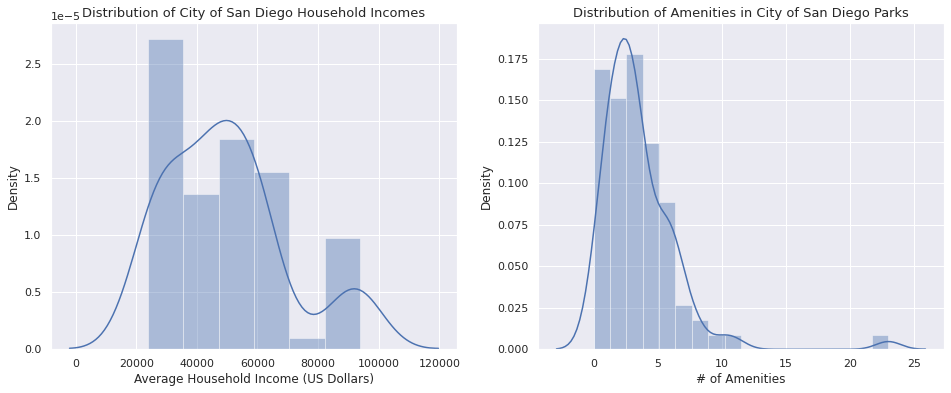

In [24]:
sns.set(rc={'figure.figsize':(16,6)})

plt.subplot(1, 2, 1)
sns.distplot(simple_df['avg_house_income'])
plt.title('Distribution of City of San Diego Household Incomes', fontsize=13)
plt.xlabel('Average Household Income (US Dollars)')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.distplot(simple_df['total_amenities'])
plt.title('Distribution of Amenities in City of San Diego Parks', fontsize=13)
plt.xlabel('# of Amenities')
plt.ylabel('Density')

The distribution of the average household income is bimodal, while the distibution of the amenities in SD City parks is unimodal. Most households have an average income ranging between 20,000 to 70,000 US dollars, although some have more. Most parks have between anywhere from 0 to 12 amenities, with one park (outlier) having a total of 23 amenities.

I will graph to see if there exists a relationship between _average household income (pertaining to zip code)_ and the _total number of park amenities for a park (pertaining to zip code)_. Each blue dot on the graph represents an observation of a joint-use park in a specific zip code. If multiple parks have the same x-value (average household income), then they are most likely located in the same zip code.

Text(0, 0.5, 'Total # Park Amenities')

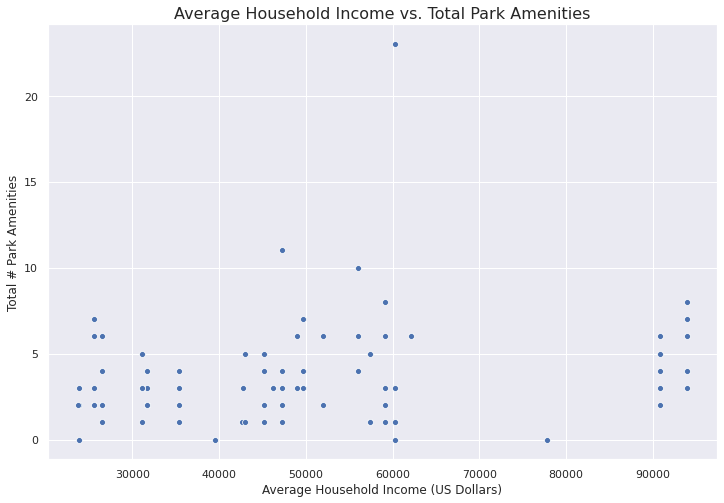

In [25]:

sns.set(rc={'figure.figsize':(12,8)})

myplot = sns.scatterplot(x='avg_house_income', y='total_amenities', data=simple_df);
myplot.set_title('Average Household Income vs. Total Park Amenities', fontsize=16);

plt.xlabel('Average Household Income (US Dollars)')
plt.ylabel('Total # Park Amenities')

From the above graph, I visualize a very weak relationship between _average household income (pertaining to zip code)_ and the _total number of park amenities for a park (pertaining to zip code)_. However, to double check, I will perform linear regression to see whether _average household income (pertaining to zip code)_ affects the _total number of park amenities for a park (pertaining to zip code)_. The linear regression line will then be plotted onto a graph to visualize the correlation/relationship.

In [26]:
outcome, predictors = patsy.dmatrices('total_amenities ~ avg_house_income', simple_df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        total_amenities   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     4.304
Date:                Wed, 16 Dec 2020   Prob (F-statistic):             0.0410
Time:                        15:52:30   Log-Likelihood:                -220.81
No. Observations:                  88   AIC:                             445.6
Df Residuals:                      86   BIC:                             450.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.8632      0.867  

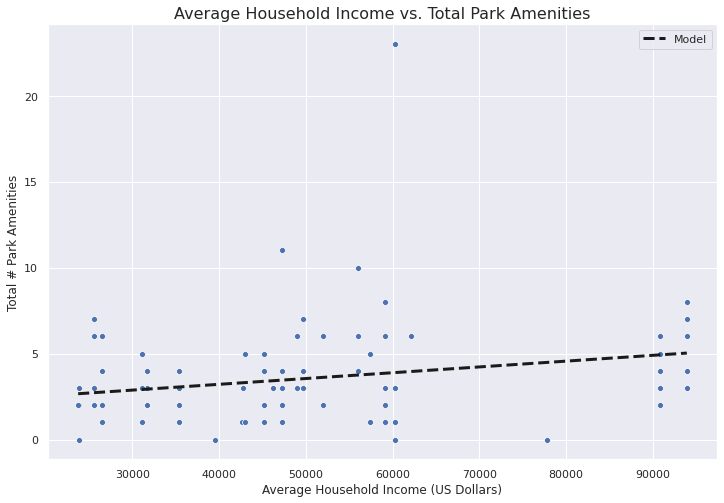

In [27]:
myplot = sns.scatterplot(x='avg_house_income', y='total_amenities', data=simple_df);
myplot.set_title('Average Household Income vs. Total Park Amenities', fontsize=16);

xs = np.arange(simple_df['avg_house_income'].min(), simple_df['avg_house_income'].max())
ys = 3.372e-05 * xs + 1.8632
plt.plot(xs, ys, '--k', linewidth=3, label='Model')

plt.xlabel('Average Household Income (US Dollars)')
plt.ylabel('Total # Park Amenities')
plt.legend();

The model fit line from the above graph shows a very _slight_ positive correlation between the average household income and the total number of park amenities. However, this correlation looks weak due to the low slope of the linear regession line, and the wide variance of data observations (given by the dots on the graph).

I will also double check the Pearson correlation between the two variables to measure the strength of association.

In [28]:
print('corr: ', pearsonr(simple_df['avg_house_income'],simple_df['total_amenities'])[0])

corr:  0.21831708492129775


A Pearson correlation of `0.21831708492129775` gives a weak strength of association between the two variables.

# Ethics & Privacy

The park and recreational data points for this project were constructed from publicly available datasets readily available from the City of San Diego. Downloading these data points from the respective websites is free and does not require any login or paywall. I abided by the City of San Diego Open Data Portal's acceptable Terms of Use, which will grant the individual or group use of their public datasets. For this project, I performed _derivative work_ based on the City of San Diego's data points. I used data points from multiple City of San Diego zip codes in order to get as much of a diverse sample as possible that is not biased towards a specific person or group. This ensured that I did not collect data points that are biased towards a specific gender, race, ethnicity, etc. I did not consider race, gender, or ethnicity as part of the project, since those variables were non-essential and were not present when I imported the data points. On another note, agencies that privately own parks may be concerned about their financial spending information being leaked out to the public. This should not be a concern for parks owned or managed by the City of San Diego since they are considered public property, hence information about them is made public.

Some people might assume that data available from governmental and public agencies has all of the personally identifiable information (PII) already removed. For safety reasons, I will double check to see if any personally identifiable information is present in any of the data points (such as name and email), and remove or exclude them from the study. In the case of the datasets I used, PII was not present. For data retention purposes, I am likely to delete the data points after a specified amount of time has passed from the completion of the research project, which is approximately 2-3 months later. If there is a copyright violation or if any public/governmental agency feels that they are harmed by the study, I could redo the study by using alternative data points that are publicly available to conduct my study.

# Conclusion & Discussion

From the data analysis, I cannot make a definitive conclusion to prove that _lower-income areas (by zip code) in the City of San Diego have less park amenities and parks located in higher-income areas (by zip code) have more park amenities._ The linear regression model that I used shows a very slight (but weak) positive relationship between average household income and the total number of park amenities. This weak positive relationship could be caused by the presence of an outlier park with 23 amenities, located in a Zip code with an average income of $60,000. My hypothesis is not correct, so therefore, _lower income areas do not necessarily have less park amenities than their higher income counterparts._

If I had more time and a wider variety of datasets to perform cleaning and analysis on, I might actually see a more interesting trend or correlation in regards to my data science question and hypothesis. The datasets would need to cover all City of San Diego zip codes and regions, instead of leaving out some areas. Instead of considering only joint-use parks, I may need to consider other types of parks managed by the City of San Diego in order to have more observations. In addition, since the 2020 Census counts are currently being tallied, it would be interesting to see how demographics have changed since the last census, and how the new average household income values would affect park amenities. San Diego's demographics have changed considerably in the past two decades.

Overall, I believe that this project provided a good start to the data science interview and investigative process. If I had more than a week to carry out the investigation, then I would most likely receive more detailed results.